In [1]:
import numpy as np
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datadir = '/media/nknezek/compute_storage/computed_solutions_nature/'
all_data = csv.writer(open(datadir+'all_data.csv','w'))
ri05p_data = csv.writer(open(datadir+'ri05p_data.csv','w'))
ri05p_l6000K_data = csv.writer(open(datadir+'ri05p_l6000K_data.csv','w'))
ri10p_data = csv.writer(open(datadir+'ri10p_data.csv','w'))

In [3]:
# percent_ric = 0.05

# tofile = './valid_results/'

for i in [0,1,2,3,4,5]:
    reader = csv.reader(open(datadir+'run_data{}.csv'.format(i),'r'))
    for row in reader:
        all_data.writerow(row)
        if np.abs(float(row[1])/1220e3-1) < 0.05:
            ri05p_data.writerow(row)
            if float(row[2])<=6000:
                ri05p_l6000K_data.writerow(row)
        if np.abs(float(row[1])/1220e3-1) < 0.10:
            ri10p_data.writerow(row)
         
#             foldername = "./Tc{:.1f}_XM{:.3f}_XS{:.3f}_XO{:.3f}/".format(float(row[2]), float(row[3]), float(row[4]), float(row[5]))
#             os.system('cp {fr} {to}'.format(fr=foldername, to=tofile))

In [5]:
dfall = pd.read_csv(datadir+'all_data.csv', names=['time', 'r_i', 'T_cmb0', 'X_Mg_0', 'X_Si_0', 'X_O_0', 'MgNumFp', 'MgNumPv', 'X_MgFeO_b', 'X_SiO2_b', 'nu_present', 'deltaT0', 'layer_thickness', 'overturn'])

/home/nknezek/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,5,8,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
dfall['T_cmb0'].unique()

array([4800., 4900., 5000., 5100., 5200., 4700., 5300., 5400., 5500.,
       5600., 5700., 5800., 5900., 6000., 6100., 6200., 6300., 6400.,
       6500.])

In [7]:
dfall.describe()

,r_i,T_cmb0,X_Mg_0,MgNumFp,MgNumPv,X_SiO2_b,nu_present,deltaT0,layer_thickness
count,7.259300e+04,134529.000000,134529.000000,134526.000000,134529.000000,134528.000000,1.345290e+05,134529.000000,134529.000000
mean,7.790350e+05,5430.210587,0.024007,0.837162,1.054110,0.015001,1.999926e+17,2431.770953,99.996307
std,8.835535e+05,489.844673,0.015791,13.630048,26.295081,0.000225,1.219272e+15,203.488953,0.605749
min,0.000000e+00,4700.000000,0.000010,0.800000,0.050000,0.015000,1.000000e-05,0.000010,0.090000
25%,0.000000e+00,5000.000000,0.010008,0.800000,0.930000,0.015000,2.000000e+17,2253.618971,100.000000
50%,0.000000e+00,5300.000000,0.025005,0.800000,0.930000,0.015000,2.000000e+17,2377.913327,100.000000
75%,1.637596e+06,5800.000000,0.037503,0.800000,0.930000,0.015000,2.000000e+17,2585.070587,100.000000
max,2.543860e+06,6500.000000,0.050000,5000.000000,5800.000000,0.075000,2.000000e+17,2875.090751,100.000000


# Play with valid solutions within 5%, Tc<6000K

In [8]:
df05l6000 = pd.read_csv(datadir+'ri05p_l6000K_data.csv', names=['time', 'r_i', 'T_cmb0', 'X_Mg_0', 'X_Si_0', 'X_O_0', 'MgNumFp', 'MgNumPv', 'X_MgFeO_b', 'X_SiO2_b', 'nu_present', 'deltaT0', 'layer_thickness', 'overturn'])

In [9]:
df05l6000.describe()

,r_i,T_cmb0,X_Mg_0,X_Si_0,X_O_0,MgNumFp,MgNumPv,X_MgFeO_b,X_SiO2_b,nu_present,deltaT0,layer_thickness,overturn
count,1.548000e+03,1548.000000,1548.000000,1548.000000,1548.000000,1548.0,1.548000e+03,1548.000,1.548000e+03,1.548000e+03,1548.000000,1548.0,1548.0
mean,1.220926e+06,5435.852713,0.017250,0.032909,0.070028,0.8,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2434.199079,100.0,600.0
std,3.507243e+04,248.798242,0.015388,0.023775,0.044397,0.0,1.110582e-16,0.000,5.205852e-18,0.000000e+00,103.080724,0.0,0.0
min,1.159085e+06,4900.000000,0.000010,0.000010,0.000010,0.8,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2212.187519,100.0,600.0
25%,1.191550e+06,5200.000000,0.005009,0.015007,0.035008,0.8,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2336.481875,100.0,600.0
50%,1.221140e+06,5300.000000,0.015007,0.030004,0.060006,0.8,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2377.913327,100.0,600.0
75%,1.251468e+06,5600.000000,0.030004,0.050000,0.095004,0.8,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2502.207683,100.0,600.0
max,1.280979e+06,6000.000000,0.050000,0.100000,0.230000,0.8,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2667.933491,100.0,600.0


# Play with valid solutions within 5%

In [126]:
df05 = pd.read_csv('../computed_solutions_nature/ri05p_data.csv', names=['time', 'r_i', 'T_cmb0', 'X_Mg_0', 'X_Si_0', 'X_O_0', 'MgNumFp', 'MgNumPv', 'X_MgFeO_b', 'X_SiO2_b', 'nu_present', 'deltaT0', 'layer_thickness', 'overturn'])

In [127]:
df05.describe()

,r_i,T_cmb0,X_Mg_0,X_Si_0,X_O_0,MgNumFp,MgNumPv,X_MgFeO_b,X_SiO2_b,nu_present,deltaT0,layer_thickness,overturn
count,1.989000e+03,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1.989000e+03,1989.000,1.989000e+03,1.989000e+03,1989.000000,1989.0,1989.0
mean,1.223545e+06,5632.780292,0.017393,0.030197,0.057792,8.000000e-01,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2515.789034,100.0,600.0
std,3.492543e+04,426.972123,0.015417,0.022654,0.045724,1.110502e-16,3.331507e-16,0.000,6.940639e-18,0.000000e+00,176.900750,0.0,0.0
min,1.159085e+06,4900.000000,0.000010,0.000010,0.000010,8.000000e-01,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2212.187519,100.0,600.0
25%,1.193291e+06,5300.000000,0.005009,0.010008,0.025008,8.000000e-01,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2377.913327,100.0,600.0
50%,1.226591e+06,5500.000000,0.015007,0.030004,0.045007,8.000000e-01,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2460.776231,100.0,600.0
75%,1.255619e+06,6000.000000,0.030004,0.045001,0.085004,8.000000e-01,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2667.933491,100.0,600.0
max,1.280979e+06,6400.000000,0.050000,0.100000,0.230000,8.000000e-01,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2833.659299,100.0,600.0


In [34]:
df05['T_cmb0'].unique()

array([5200., 5300., 5400., 5500., 5600., 5700., 5800., 5900., 6000.,
       6100., 6200., 6300., 6400.])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f76e7e1e470>]],
      dtype=object)

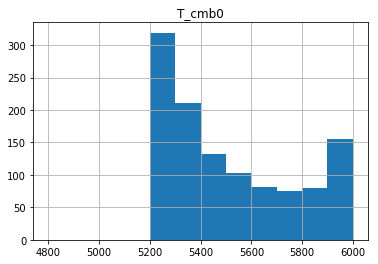

In [35]:
df05.hist('T_cmb0',bins=np.linspace(4800,6000,13))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f76e759d588>]],
      dtype=object)

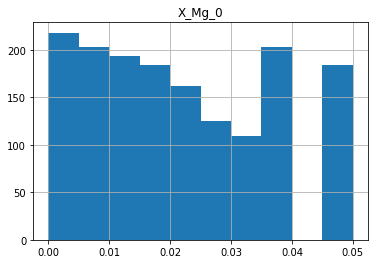

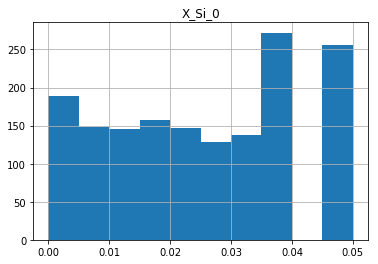

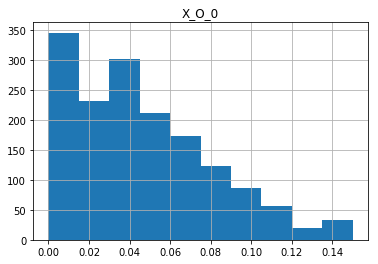

In [36]:
df05.hist('X_Mg_0')
df05.hist('X_Si_0')
df05.hist('X_O_0')

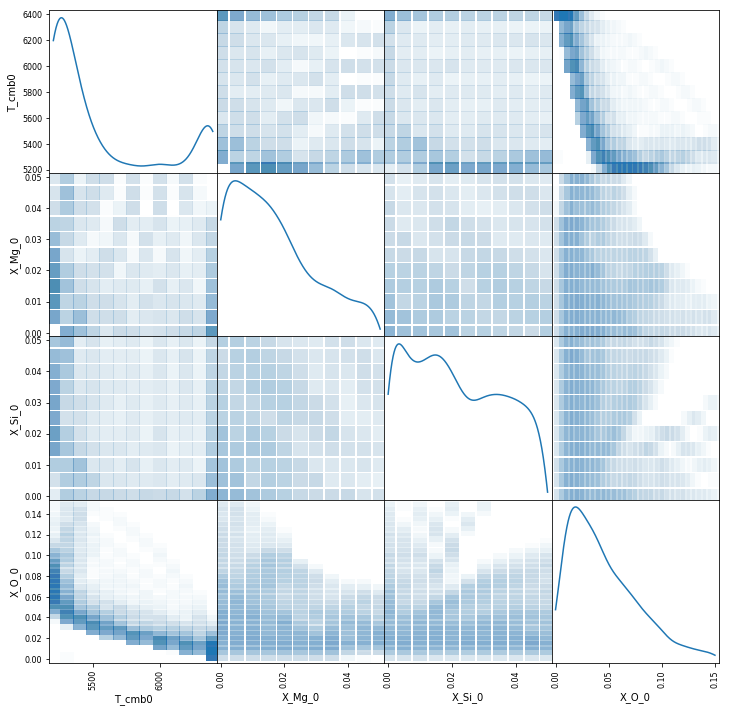

In [37]:
pd.plotting.scatter_matrix(df05[['T_cmb0','X_Mg_0','X_Si_0','X_O_0']], alpha=0.02, figsize=(12, 12), diagonal='kde', marker='s', s=200)
plt.savefig('ri05p_scatter_matrix.pdf')

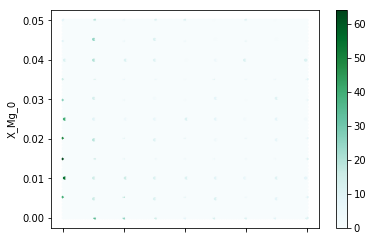

In [24]:
df05.plot(kind='hexbin', x='T_cmb0',y='X_Mg_0',)

# Play with valid solutions within 10%

In [38]:
df10 = pd.read_csv('../computed_solutions_nature/ri10p_data.csv', names=['time', 'r_i', 'T_cmb0', 'X_Mg_0', 'X_Si_0', 'X_O_0', 'MgNumFp', 'MgNumPv', 'X_MgFeO_b', 'X_SiO2_b', 'nu_present', 'deltaT0', 'layer_thickness', 'overturn'])

In [39]:
df10.describe()

,r_i,T_cmb0,X_Mg_0,X_Si_0,X_O_0,MgNumFp,MgNumPv,X_MgFeO_b,X_SiO2_b,nu_present,deltaT0,layer_thickness,overturn
count,3.226000e+03,3226.000000,3226.000000,3226.000000,3226.000000,3226.0,3.226000e+03,3226.000,3.226000e+03,3.226000e+03,3226.000000,3226.0,3226.0
mean,1.215967e+06,5705.300682,0.020300,0.023359,0.046052,0.8,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2545.835284,100.0,600.0
std,6.902868e+04,449.633566,0.015286,0.016116,0.034177,0.0,2.220790e-16,0.000,5.204977e-18,0.000000e+00,186.289715,0.0,0.0
min,1.098003e+06,5100.000000,0.000010,0.000010,0.000010,0.8,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2295.050423,100.0,600.0
25%,1.150611e+06,5300.000000,0.005009,0.010008,0.020009,0.8,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2377.913327,100.0,600.0
50%,1.216580e+06,5600.000000,0.020006,0.020006,0.035008,0.8,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2502.207683,100.0,600.0
75%,1.270553e+06,6100.000000,0.030004,0.035003,0.065006,0.8,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2709.364943,100.0,600.0
max,1.341970e+06,6500.000000,0.050000,0.050000,0.150000,0.8,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2875.090751,100.0,600.0


In [40]:
df10['T_cmb0'].unique()

array([5100., 5200., 5300., 5400., 5500., 5600., 5700., 5800., 5900.,
       6000., 6100., 6200., 6300., 6400., 6500.])

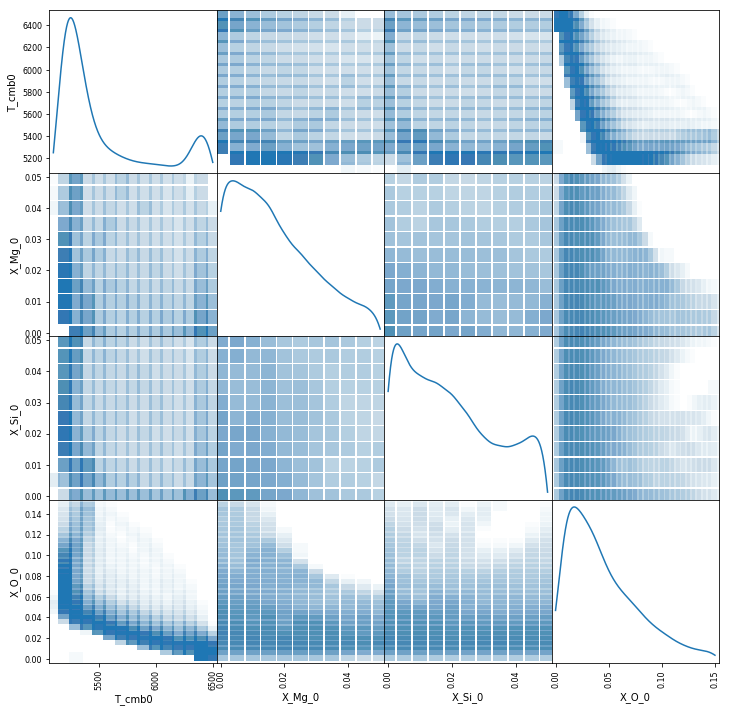

In [41]:
pd.plotting.scatter_matrix(df10[['T_cmb0','X_Mg_0','X_Si_0','X_O_0']], alpha=0.02, figsize=(12, 12), diagonal='kde', marker='s', s=200)
plt.savefig('ri10p_scatter_matrix.pdf')